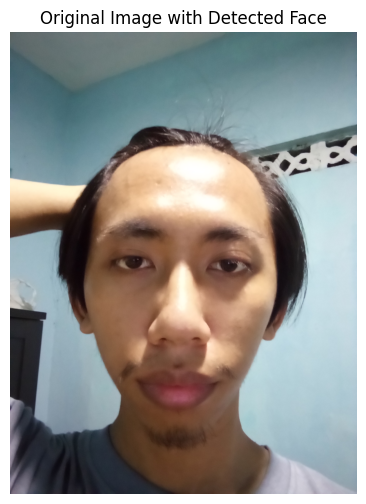

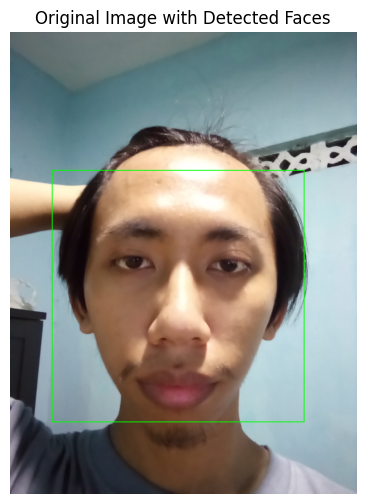

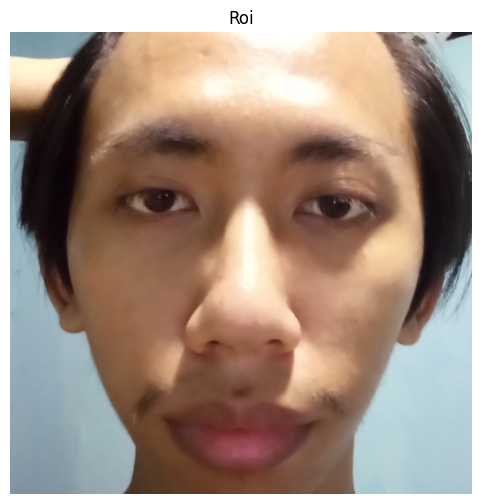

In [20]:
import cv2
import matplotlib.pyplot as plt

# Load Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the input image
img_path = 'C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/aku/aku1.jpg'
img = cv2.imread(img_path)

# Convert the image to grayscale (required for face detection)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image using the face_cascade
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)

# Show the original image with the detected face
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Face')
plt.axis('off')
plt.show()


# Draw bounding boxes around the detected faces and display the image
for (x, y, w, h) in faces:
    # Draw a rectangle around the detected face
    cv2.rectangle(img, (x-5, y-5), (x + w+5, y + h+5), (0, 255, 0), 4)#beri rectangle dan beri overlap sebesar 5
    face_dataset = img[y:y+h, x:x+w]

    # Show the original image with the detected faces and bounding boxes
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image with Detected Faces')
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(face_dataset, cv2.COLOR_BGR2RGB))
    plt.title('Roi')
    plt.axis('off')
    plt.show()  

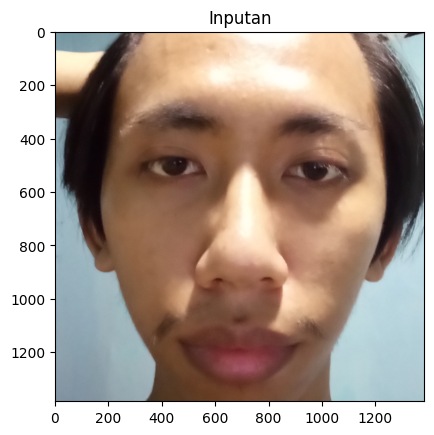

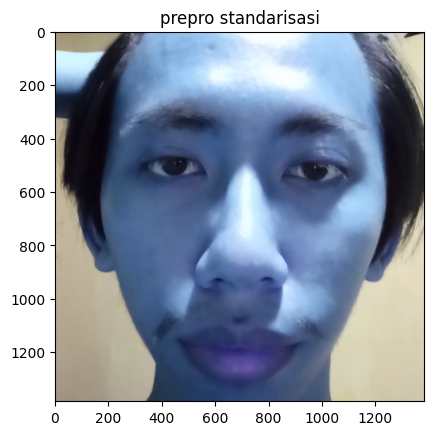

In [21]:
#image preprocessing
import cv2
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np

# img=cv2.imread('../dataset/data/IMG_5058.jpg') #baca file gambar dari direktori dengan menggunakan open cv
img = face_dataset
#plt digunakan untuk menampilkan plot / gambar
plt.figure()
plt.title("Inputan")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #menampilkan gambar
plt.show() #menampilkan plot

convert = img/255.0
plt.figure()
plt.title("prepro standarisasi") #membuat judul pada plot
plt.imshow(convert) #menampilkan gambar
plt.show()

In [22]:
def haar(img):
    status = False
    face_dataset = []
    # Load Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Convert the image to grayscale (required for face detection)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image using the face_cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    # Draw bounding boxes around the detected faces and display the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        face_dataset = img[y:y+h, x:x+w]
        status = True
    return status,face_dataset

In [23]:
#menentukan direktori/folder data citra yang akan dibuka
dirname = 'C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset'  

#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)

#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data= [] 
tampungan_label=[]
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name))  #baca path data
        if (img_path.endswith("jpg")): #dengan file berekstensi jpg
            img = cv2.imread(img_path) #baca gambar
            path_parts = path.split('/')
            # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
            last_word = path_parts[-1]
            #preprocessing data / segentasi  boleh dilakukan disini
            status, gambar_haar = haar(img)
            if(status):
                resized=cv2.resize(gambar_haar,dim, interpolation=cv2.INTER_LINEAR) #resize
                tampungan_data.append(resized/255.0) #menumpuk gambar blur pada array tampungan dan di sampling
                tampungan_label.append(last_word)
    X = np.array(tampungan_data) 
    y = np.array(tampungan_label)

C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset
C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset\aku
C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset\gibran
C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset\putin


{'Dataset\\aku': 0, 'Dataset\\gibran': 1, 'Dataset\\putin': 2}


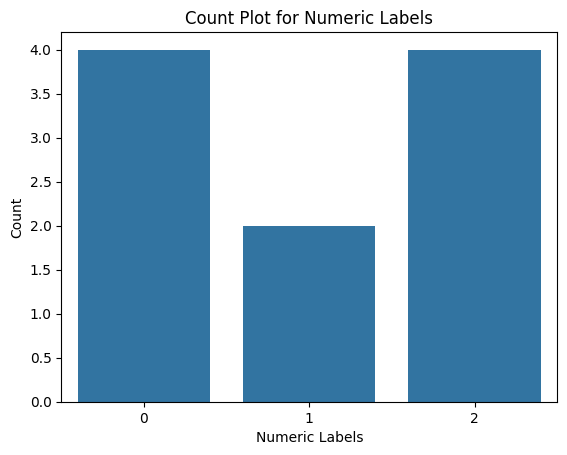

In [24]:
import seaborn as sns
list_label=np.unique(y) #mendapatkan label unik
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(label_dict)
label_numerik = [label_dict[s] for s in y] #ubah kedalam numerik
label_numerik_array = np.array(label_numerik)

# Visualisasikan jumlah dalam plot
sns.countplot(x=label_numerik_array)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()  

# simpan dalam file npy untuk labeling
np.save('C:/Users/Reza/miniconda3/envs/LatihanCV/weight/label_knn.npy', label_dict)

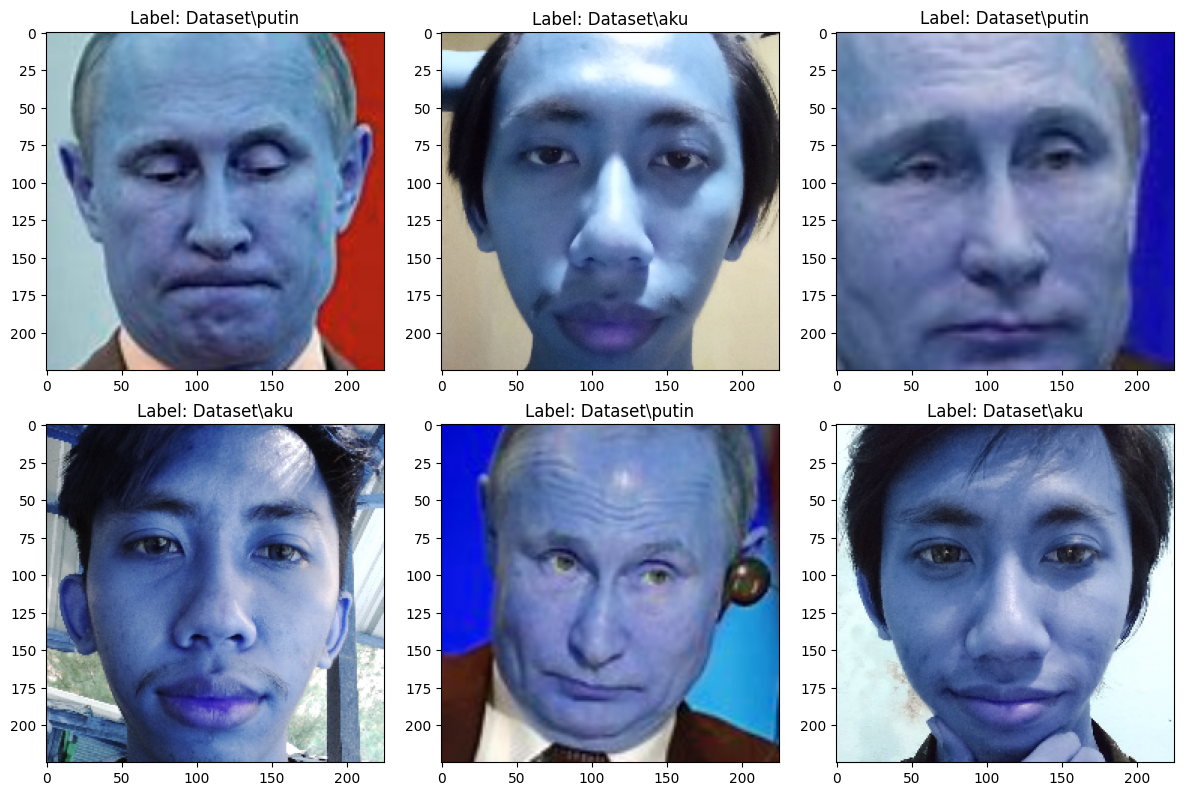

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select 6 indices from the data
random_indices = np.random.choice(len(X), 6, replace=False)

# Plot the images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[idx])
    plt.title("Label: " + str(y[idx]))
plt.tight_layout()
plt.show()

In [26]:
print(f"awal {X.shape}")

jml_data = X.shape[0]
h = X.shape[1]
w = X.shape[2]
d = X.shape[3]
flatten  = h*w*d
#untuk shape ML itu 1 dimensi jadi X 3 dimensi harus di reshape jadi 1dimensi
X_1d = X.reshape(jml_data, flatten)

print(f"akhir {X_1d.shape}")  

awal (10, 225, 225, 3)
akhir (10, 151875)


In [27]:
from sklearn.model_selection import train_test_split #library untuk train test split

#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X_1d, label_numerik_array,test_size=0.24, random_state=42, stratify=y) 
#train size adalah persentase data test yang di-split dengan proporsi label yang sama

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

X_train: (7, 151875)
X_test: (3, 151875)
y_train: (7,)
y_test: (3,)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski") #knn dengan nilai n ditentukan
model.fit(X_train,y_train) #pastikan model di "fit" = proses latih

KNeighborsClassifier()

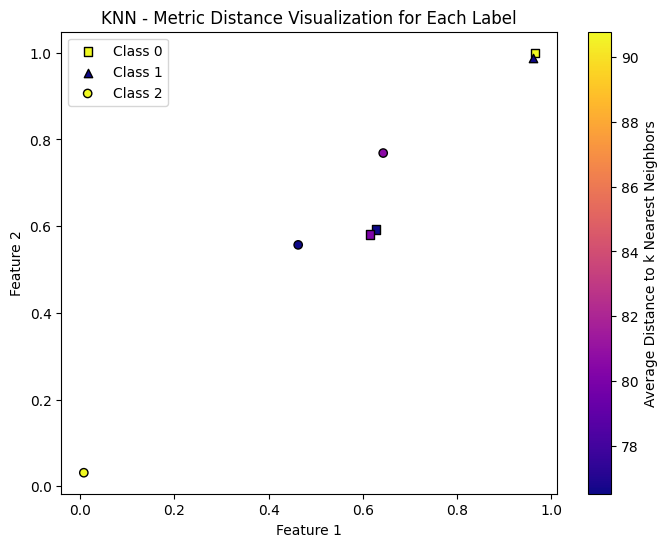

In [29]:
# Visualize the metric distances for each label separately with different marker shapes
plt.figure(figsize=(8, 6))

# Dictionary to map label to marker shape
marker_dict = {0: 's', 1: '^', 2: 'o'}
# Get the distances to the k nearest neighbors for each data point
distances, _ = model.kneighbors(X_train)
for label in np.unique(y_train):
    # Get the indices of data points belonging to the current label
    label_indices = np.where(y_train == label)[0]
    
    # Get the distances to the k nearest neighbors for data points of the current label
    label_distances = np.mean(distances[label_indices], axis=1)
    
    # Plot the distances for the current label with the corresponding marker shape
    plt.scatter(X_train[label_indices, 0], X_train[label_indices, 1], c=label_distances, cmap='plasma', edgecolors='k', label=f"Class {label}", marker=marker_dict[label])

plt.colorbar(label='Average Distance to k Nearest Neighbors')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN - Metric Distance Visualization for Each Label")
plt.legend()
plt.show()

In [30]:
y_pred = model.predict(X_test) #predict untuk memprediksi data test

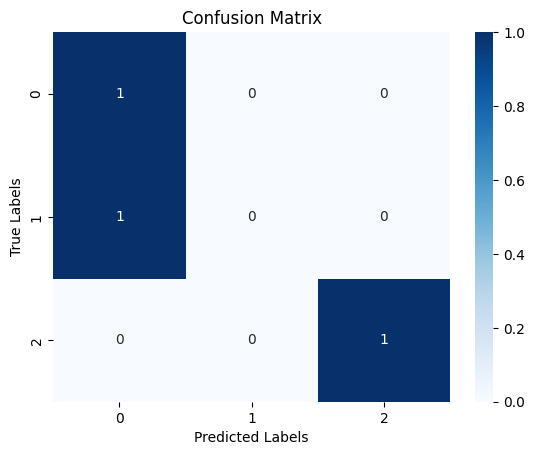

In [31]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [32]:
print(classification_report(y_test, y_pred)) #evaluasi hasil  

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


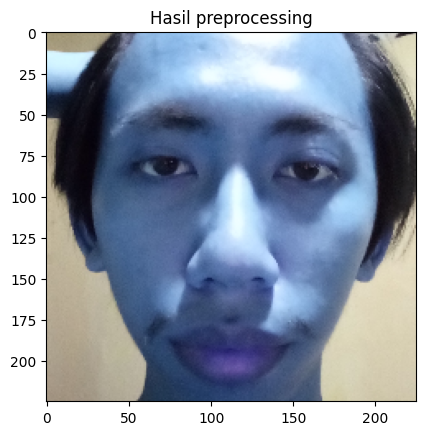

Ukuran gambar test: (1, 151875)
Dataset\aku = 60.0%
Dataset\gibran = 20.0%
Dataset\putin = 20.0%
Prediksinya: ['Dataset\\aku']
The predicted image is: [0] -> ['Dataset\\aku']


In [33]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np

# Membaca gambar
url = 'C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/aku/aku1.jpg'
img = cv2.imread(url)

# Preprocessing gambar
status, haarnya = haar(img)
convert = haarnya / 255.0
img_resize = cv2.resize(convert, (225, 225))

# Menampilkan hasil preprocessing
plt.figure()
plt.title("Hasil preprocessing")
plt.imshow(img_resize)
plt.show()

# Mengubah gambar menjadi array
test = img_resize.flatten().reshape(1, -1)

# Menampilkan ukuran gambar
print(f"Ukuran gambar test: {test.shape}")

# Menghitung probabilitas
probability = model.predict_proba(test)

# Menampilkan probabilitas tiap kelas
for ind, val in enumerate(label_dict):
    print(f"{val} = {probability[0][ind] * 100}%")

# Menampilkan prediksi kelas
hasil = np.argmax(probability, axis=-1)
key_found = [key for key, value in label_dict.items() if value == hasil]
print(f"Prediksinya: {key_found}")
print(f"The predicted image is: {str(hasil)} -> {key_found}")


In [34]:
import pickle
pickle.dump(model, open('model_haar_knn.pkl', 'wb')) #simpan dalam file.pkl
loaded_model = pickle.load(open('model_haar_knn.pkl', 'rb')) # load model yg dibuat

result = loaded_model.predict(X_test) 
print(classification_report(y_test, result)) #evaluasi hasil best model

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
import cv2
import matplotlib.pyplot as plt
import os
def haar(img):
    face_dataset = []
    status = False
    # Load Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Convert the image to grayscale (required for face detection)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image using the face_cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    # Draw bounding boxes around the detected faces and display the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        face_dataset = img[y:y+h, x:x+w]
        status = True
    return status,face_dataset

 jumlah keypoint terbentuk 413


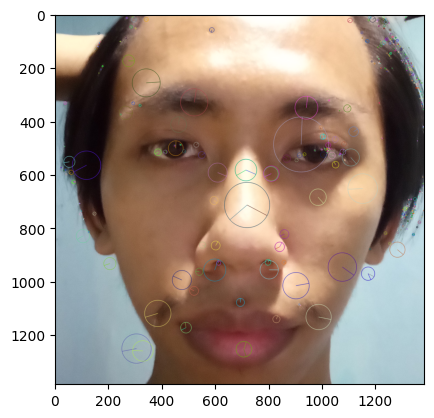

In [36]:
import cv2
import matplotlib.pyplot as plt

# Loading the image
img = cv2.imread('C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/aku/aku1.jpg')
status,haarnya=haar(img)
# Applying SIFT detector
sift = cv2.SIFT_create(500)
kpts, des = sift.detectAndCompute(haarnya, None)
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(haarnya, kpts , haarnya ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(f" jumlah keypoint terbentuk {len(kpts)}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [37]:
import numpy as np
# kmeans works only on float, so convert integers to float
descriptors_float = des.astype(float)
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq
k = 100  #dari total 500 diambil hanya 200
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)
# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((1, k), "float32")
for i in range(1):
    words, distance = vq(des,voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)
print(im_features)


(1, 100)
[[ 4.  3.  3.  6.  9.  2.  1.  4.  3.  7.  5.  1.  2.  3.  5.  1.  5.  4.
   1.  3.  1.  4.  2.  4.  3.  5.  1.  2.  9.  2.  4.  3.  2.  3.  4.  1.
   2.  4.  2.  5.  2.  9.  2.  8.  1.  7.  2.  2.  4.  3.  6.  6.  5.  7.
   4.  3.  3.  5.  6. 10.  1.  3.  8.  5.  4.  2.  2.  7.  6.  1.  1.  1.
  13.  6.  4. 11.  3.  3.  3.  5.  7.  1.  7.  7.  4.  4.  3.  9.  2.  7.
   5.  5.  5.  1.  1.  4.  2.  7.  7.  6.]]


In [38]:
#menentukan direktori/folder data citra yang akan dibuka
dirname = 'C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/'  

#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example  
sift = cv2.SIFT_create()
#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data = [] 
tampungan_label = []
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name))  #baca path data
        if (img_path.endswith("jpg")): #dengan file berekstensi jpg
            img = cv2.imread(img_path) #baca gambar
            status, haarnya = haar(img)
            if(status):
                resized=cv2.resize(haarnya,dim, interpolation=cv2.INTER_LINEAR) #resize
                kpts, des = sift.detectAndCompute(resized, None)
                tampungan_data.append(des)
                
                path_parts = path.split('/')
                # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
                last_word = path_parts[-1]
                #preprocessing data / segentasi  boleh dilakukan disini
                tampungan_label.append(last_word)
    X = np.array(tampungan_data, dtype=object) 
    y = np.array(tampungan_label) 

C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/
C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/aku
C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/gibran
C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/putin


In [39]:
descriptors = None
for descriptor in X:
    if descriptors is None:
        descriptors = descriptor
    else:
        descriptors = np.vstack((descriptors, descriptor)) #gunakan untuk menggabungkan deskriptor menjadi satu tumpukan

#kmeans works only on float, so convert integers to float
descriptors_float = descriptors.astype(float)  
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq

k = 200  #k means with 100 clusters gives lower accuracy for the aeroplane example
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5) 

# Calculate the histogram of features and represent them as vector
# vq Assigns codes from a code book to observations.
im_features = np.zeros((len(y), k), "float32")
for i in range(len(y)):
    words, distance = vq(X[i],voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)

(10, 200)


{'aku': 0, 'gibran': 1, 'putin': 2} jumlah data: 10


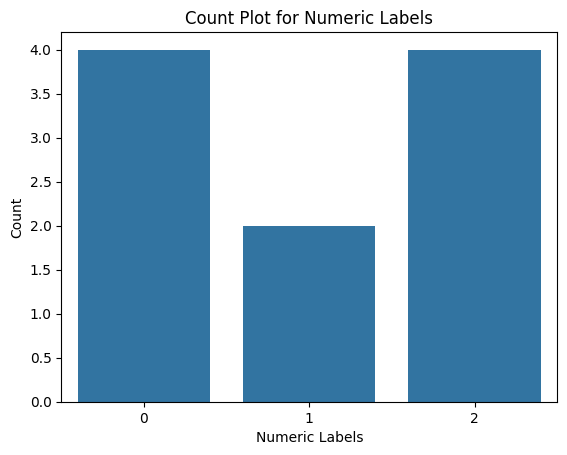

X_train: (7, 200)
X_test: (3, 200)
y_train: (7,)
y_test: (3,)


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #library untuk train test split

"""Klasifikasi KNN
- Membuat dan menjelaskan fungsi dari K-Fold untuk performa model yang stabil
- Memvisualisasikan persebaran label dataset"""

list_label=np.unique(y) #mendapatkan label
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(f"{label_dict} jumlah data: {len(y)}")

label_numerik = [label_dict[s] for s in y] #ubah kedalam numerik
label_numerik_array = np.array(label_numerik)

# Visualisasikan dalam jumlah dalam plot
sns.countplot(x=label_numerik_array)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()
#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(im_features, label_numerik_array,test_size=0.24, random_state=42, stratify=y) 
#train size adalah persentase data test yang di-split dengan proporsi label yang sama

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

# simpan dalam file npy untuk labeling
np.save('C:/Users/Reza/miniconda3/envs/LatihanCV/weight/label_knn.npy', label_dict)  

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski") #knn dengan nilai n ditentukan
model.fit(X_train, y_train) #pastikan model di "fit" = proses latih

KNeighborsClassifier()

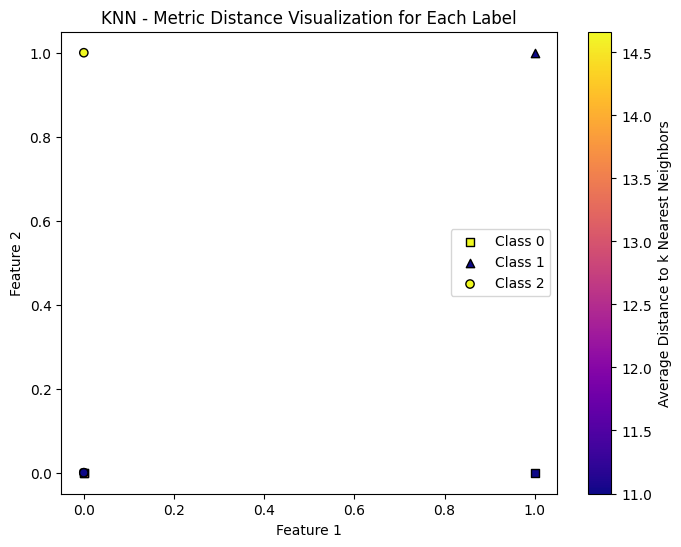

In [42]:
import matplotlib.pyplot as plt
#Hasil daripada Klasifikasi
# Visualize the metric distances for each label separately with different marker shapes
plt.figure(figsize=(8, 6))
distances, _ = model.kneighbors(X_train)

# Dictionary to map label to marker shape
marker_dict = {0: 's', 1: '^', 2: 'o'}

for label in np.unique(y_train):
    # Get the indices of data points belonging to the current label
    label_indices = np.where(y_train == label)[0]
    
    # Get the distances to the k nearest neighbors for data points of the current label
    label_distances = np.mean(distances[label_indices], axis=1)
    
    # Plot the distances for the current label with the corresponding marker shape
    plt.scatter(X_train[label_indices, 0], X_train[label_indices, 1], c=label_distances, cmap='plasma', edgecolors='k', label=f"Class {label}", marker=marker_dict[label])

plt.colorbar(label='Average Distance to k Nearest Neighbors')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN - Metric Distance Visualization for Each Label")
plt.legend()
plt.show()

In [43]:
y_pred = model.predict(X_test) #predict untuk memprediksi data test

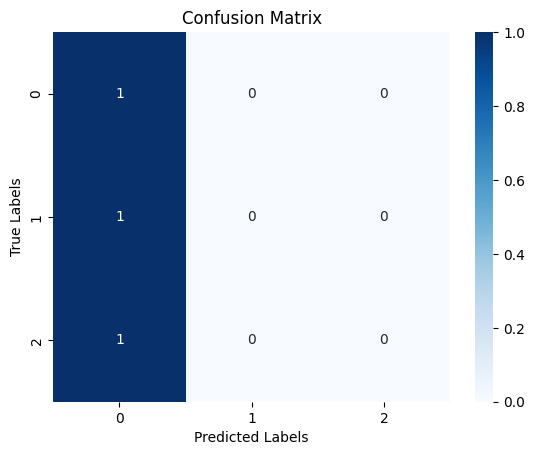

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred)) #evaluasi hasil

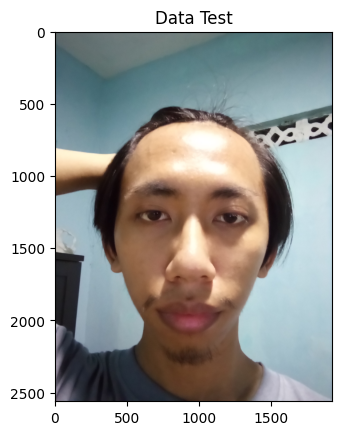

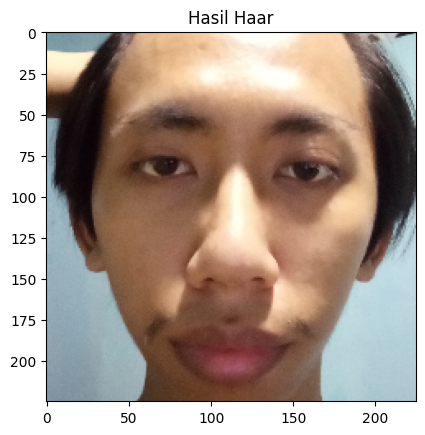

 jumlah keypoint terbentuk 193


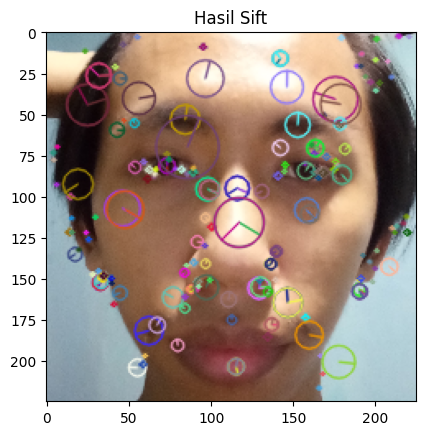

ValueError: Cannot take a larger sample than population when 'replace=False'

In [45]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np

url= 'C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset/aku/aku1.jpg'
img=cv2.imread(url)
plt.figure()
plt.title("Data Test")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#pastikan langkah preprocessing yang dilakukan sama dengan data train
status,haarnya=haar(img)
img_resize = cv2.resize(haarnya,(225,225))
plt.figure()
plt.title("Hasil Haar")
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
plt.show()

#sift
sift = cv2.SIFT_create()
sift = cv2.SIFT_create(nfeatures=500, nOctaveLayers=9, contrastThreshold=0.03, edgeThreshold=10, sigma=1.6)
kpts, des = sift.detectAndCompute(img_resize, None)
plt.figure()
plt.title("Hasil Sift")

# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(img_resize, kpts , img_resize ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(f" jumlah keypoint terbentuk {len(kpts)}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# bovw
#kmeans works only on float, so convert integers to float
descriptors_float = des.astype(float)

# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq
k = 300  #dari total 500 diambil hanya 200
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)

# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((1, k), "float32")
for i in range(1):
    words, distance = vq(des,voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)

print(f"ukuran data test {im_features.shape}") #sama dengan input shape

# Mengecek hasil klasifikasi pada salah satu dataset
probability=model.predict_proba(im_features)
print(f"nilai probabilitas {probability}") #tampilkan nilai probabilitas tiap kelas

for ind,val in enumerate(label_dict): #mendapatkan nama kelas dan hasil akurasi
    print(f'{val} = {probability[0][ind]*100}%')
    

hasil = np.argmax(probability, axis=-1) #mendapatkan kelas dari probabilitas terbaik
key_found = [key for key, value in label_dict.items() if value == hasil] #dapatkan namanya
print(f"prediksinya: {key_found}")
print(f"The predicted image is : {str(hasil)} -> {key_found}")

In [46]:
import pickle
pickle.dump(model, open('C:\\Users\\Reza\\miniconda3\\envs\\LatihanCV\\weight\\model_haar_sift_knn.pkl', 'wb')) #simpan dalam file.pkl